In [1]:
'''GENERATE DATA'''
N = 1000
import random as r,csv
with open('data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["x0","x1","x2","y1","y2","class"])
    for i in range(N):
        if(r.random()>0.7):
            writer.writerow(["1",str(-1+r.random()*2),str(-1+r.random()*2),"1","0","1"])
        else:
            writer.writerow(["1",str(r.uniform(2,4)*pow(-1,r.randint(0,1))),str(r.uniform(2,4)*pow(-1,r.randint(0,1))),"0","1","2"])
                

    

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data.csv')
print(df)

     x0        x1        x2  y1  y2  class
0     1  2.124219 -3.226570   0   1      2
1     1  0.969369  0.248921   1   0      1
2     1 -3.759383 -2.128548   0   1      2
3     1  3.831701 -2.421514   0   1      2
4     1 -2.817601  2.467222   0   1      2
5     1  0.618064 -0.210329   1   0      1
6     1 -2.549596 -2.727186   0   1      2
7     1 -2.206159  3.545089   0   1      2
8     1 -2.282311  2.930463   0   1      2
9     1  3.975244 -3.252549   0   1      2
10    1  3.757497  3.638465   0   1      2
11    1  0.486467 -0.682497   1   0      1
12    1  0.859030 -0.927533   1   0      1
13    1 -3.702582 -2.492788   0   1      2
14    1 -3.418421 -3.412999   0   1      2
15    1  0.010660 -0.100495   1   0      1
16    1  0.294892  0.169673   1   0      1
17    1  3.549169  2.819803   0   1      2
18    1  0.857833 -0.564518   1   0      1
19    1 -2.864371 -3.101621   0   1      2
20    1 -3.935236 -2.275451   0   1      2
21    1 -2.446959  3.386298   0   1      2
22    1  2.

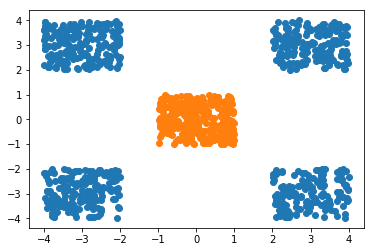

In [3]:
groups = df.groupby('y1')
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x1, group.x2, marker='o', linestyle='')
plt.show()

In [4]:
N = len(df)
h = 3
C = 2
d = 2

In [5]:
import numpy as np

u1 = np.random.rand(N,h+1)
v1 = np.random.rand(N,h+1)
u2 = np.random.rand(N,2)
v2 = np.random.rand(N,2)

w1 = np.random.rand(h+1,d+1)
w2 = np.random.rand(2,h+1)


print(w1)
print()
print(w2)
print()
X = df[['x0','x1','x2']].values
y = df[['y1','y2','class']].values

trainset = int(0.7*N)

print(X)
print(y)

[[0.02634501 0.63949058 0.46510799]
 [0.16635249 0.21141979 0.62870056]
 [0.69454771 0.96069322 0.90353242]
 [0.73396909 0.99858685 0.38497256]]

[[0.71750119 0.22988666 0.49576366 0.5796551 ]
 [0.36336229 0.59918038 0.17506351 0.55264933]]

[[ 1.          2.12421886 -3.22656962]
 [ 1.          0.96936869  0.24892082]
 [ 1.         -3.75938299 -2.12854785]
 ...
 [ 1.         -2.8621168  -2.90033208]
 [ 1.         -2.51412716 -3.60073085]
 [ 1.          2.36182653  3.69048384]]
[[0 1 2]
 [1 0 1]
 [0 1 2]
 ...
 [0 1 2]
 [0 1 2]
 [0 1 2]]


In [6]:
import math
def phi(x):
    return 1/(1.0+math.exp(-x))

def dphi(x):
    return phi(x)*(1-phi(x))

def calcU1nj(n,j):
    s = 0
    for i in range(d+1):
        s += w1[j][i]*X[n][i]
    return s

def calcU2nk(n,k):
    s = 0
    for j in range(h+1):
        s += w2[k][j]*v1[n][j]
    return s

In [7]:
# Algorithm
epoch = 100
eta = 0.1
errors = []
for e in range(epoch):
    error = 0
    for n in range(trainset):
        for j in range(1,h+1):
            u1[n][j] = calcU1nj(n,j)
            v1[n][j] = phi(u1[n][j])
        err = 0
        for k in range(2):
            u2[n][k] = calcU2nk(n,k)
            v2[n][k] = phi(u2[n][k])
            err += (1/2)*((v2[n][k] - y[n][k])**2)
        
        error += err
        # Backprop
        for k in range(2):
            for j in range(h+1):
                w2[k][j] += eta*(y[n][k]-v2[n][k])*dphi(u2[n][k])*v1[n][j]
        for i in range(d+1):
            for j in range(1,h+1):
                w1[j][i] += eta*dphi(u1[n][j])*X[n][i]*sum([(y[n][k] - v2[n][k])*dphi(u2[n][k])*w2[k][j] for k in range(2)])
    print("Epoch :", e, "Training Error : ", error/trainset)
    errors.append(error/trainset)


Epoch : 0 Training Error :  0.230027712639596
Epoch : 1 Training Error :  0.21383890788894414
Epoch : 2 Training Error :  0.21253690978111978
Epoch : 3 Training Error :  0.21216619123910047
Epoch : 4 Training Error :  0.21185572451866855
Epoch : 5 Training Error :  0.2114959544758277
Epoch : 6 Training Error :  0.21094945836748707
Epoch : 7 Training Error :  0.20986766112875505
Epoch : 8 Training Error :  0.20650092482893703
Epoch : 9 Training Error :  0.19443131050140566
Epoch : 10 Training Error :  0.16468919074285587
Epoch : 11 Training Error :  0.1171751354554729
Epoch : 12 Training Error :  0.07629161283839622
Epoch : 13 Training Error :  0.05144854625699008
Epoch : 14 Training Error :  0.03708948749836936
Epoch : 15 Training Error :  0.028318735263558915
Epoch : 16 Training Error :  0.022589438333627046
Epoch : 17 Training Error :  0.018624403819565254
Epoch : 18 Training Error :  0.015749480329085984
Epoch : 19 Training Error :  0.013585640886807292
Epoch : 20 Training Error :  

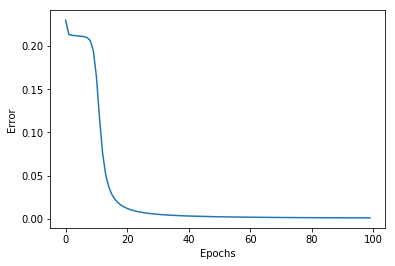

In [8]:
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(len(errors)),errors)

Accuracy :  1.0


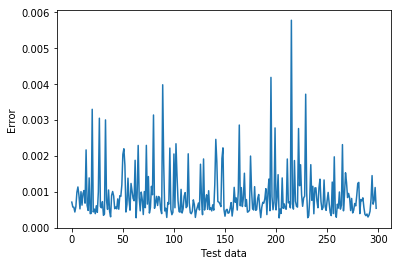

In [9]:
# testing
testerrors = []
correct = 0
for n in range(trainset+1,N):
    for j in range(1,h+1):
        u1[n][j] = calcU1nj(n,j)
        v1[n][j] = phi(u1[n][j])
    error = 0
    for k in range(2):
        u2[n][k] = calcU2nk(n,k)
        v2[n][k] = phi(u2[n][k])
        error += (v2[n][k] - y[n][k])**2
    
    # check for misclassification
    c = np.argmax(v2[n])+1
    if(c==y[n][2]):
        correct+=1
    testerrors.append(error/2)
print("Accuracy : ",correct/(N-1-trainset))

plt.xlabel('Test data')
plt.ylabel('Error')
plt.plot(range(len(testerrors)),testerrors)